In [1]:
from distributions import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Example 1: Binomial distributions
n_trials = 50
theta = 0.6
k_successes = np.array(range(n_trials+1))
p_k = np.array([binomial_distribution(n_trials, ki, theta) for ki in k_successes])

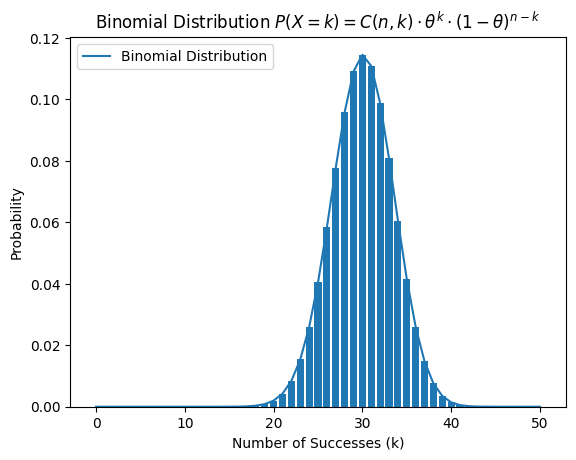

In [3]:
# Create the bar plot
plt.bar(k_successes, p_k)
plt.plot(p_k)
# Add labels and title
plt.xlabel('Number of Successes (k)')
plt.ylabel('Probability')
plt.title('Binomial Distribution ' + r'$P(X=k) = C(n, k) \cdot \theta^{k} \cdot (1-\theta)^{n-k}$')

# Add a legend
plt.legend(['Binomial Distribution'])

# Display the formula used


# Show the plot
plt.show()

In [4]:
#Example2: Multinomial Distributions:
"""   
      ------------------------
Type: |O    |A    |B    |AB  |
      ------------------------
Prob: |0.44 |0,42 |0.10 |0.04|
      ------------------------
In a simple of 20 Americans, what is the probablity of 6 having:
O:  6
A:  2
B:  1
AB: 1
"""
prob_outcomes = np.array([0.44, 0.42, 0.10, 0.04])
X = np.array([6, 2, 1, 1])
print(calculate_multinomial_distribution(X, prob_outcomes))

0.012902538743119873


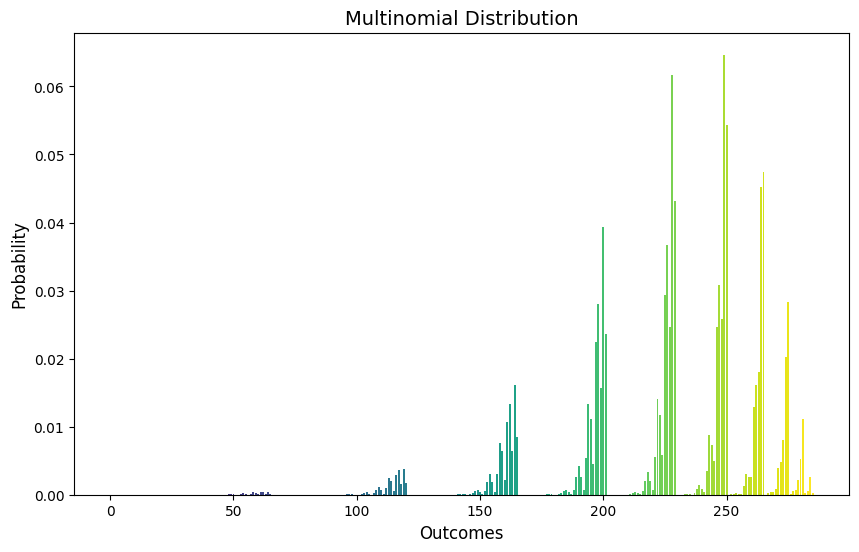

In [5]:
#Examples generalized
from itertools import product

X = np.array(list(product(list(range(11)), repeat=4)))
X = X[np.sum(X, axis=1) == 10]
prob = [calculate_multinomial_distribution(X[i], prob_outcomes) for i in range(X.shape[0])]
X_map = np.array(list(range(len(X))))
colors = plt.cm.viridis(np.linspace(0, 1, len(X_map)))

plt.figure(figsize=(10, 6))
plt.bar(X_map, prob, color=colors)
plt.title('Multinomial Distribution', fontsize=14)
plt.xlabel('Outcomes', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.show()


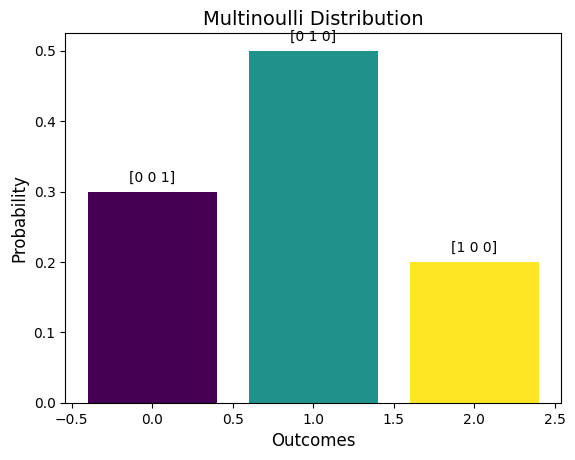

In [6]:
#Simple Multinoulli example with k = 3
X = np.array(list(product(list(range(2)), repeat=3)))
X = X[np.sum(X, axis=1) == 1]
theta = np.array([0.2, 0.5, 0.3])
probX = [multinoulli_distribution(x, theta) for x in X]
X_map = np.array(list(range(len(X))))
colors = plt.cm.viridis(np.linspace(0, 1, len(X_map)))
bars = plt.bar(X_map, probX, color=colors)
for bar, outcome in zip(bars, X):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, str(outcome), ha='center', va='bottom')

plt.title('Multinoulli Distribution', fontsize=14)
plt.xlabel('Outcomes', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.show()

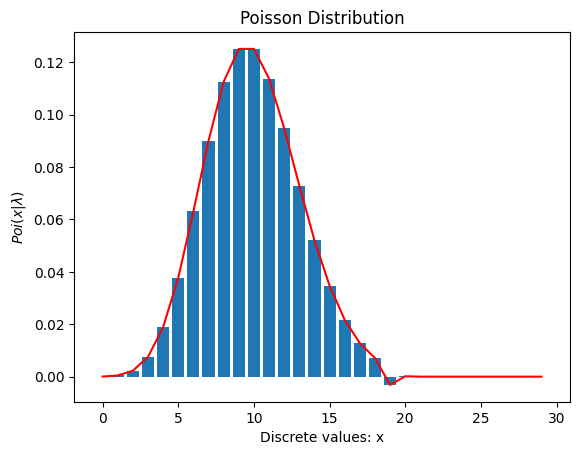

In [7]:
#Poisson Distributions Example
X = np.array(list(range(30)))
_lambda = 10
poi_lambda = np.array([poisson_distribution(x, _lambda) for x in X])
plt.bar(X, poi_lambda)
plt.plot(X, poi_lambda, color='red')
plt.xlabel('Discrete values: x')
plt.ylabel(r'$Poi(x|\lambda)$')
plt.title("Poisson Distribution")
plt.show()

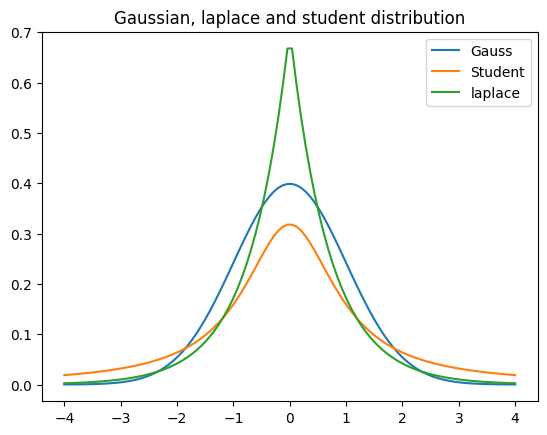

In [8]:
#Examples for Gaussian, Student T and Laplace distribution
X = np.linspace(-4, 4, 100)
X_gauss = gaussian_distribution(X, 0, 1)
X_student = student_T_distribution(X, 0, 1, 1)
X_laplace = laplace_distribution(X, 0, 1/np.sqrt(2))
plt.plot(X, X_gauss, label="Gauss")
plt.plot(X, X_student, label="Student")
plt.plot(X, X_laplace, label="laplace")
plt.legend()
plt.title("Gaussian, laplace and student distribution")
plt.show()

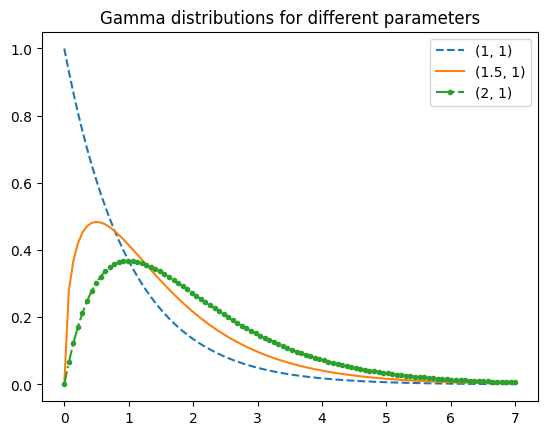

In [9]:
parameters = [(1, 1), (1.5, 1), (2, 1)]
form = ['--', '-', '-..', 'o']
X = np.linspace(0, 7, 100)
for i, param in enumerate(parameters):
    shape, rate = param[0], param[1]
    X_gamma = gamma_distribution(X, shape, rate)
    plt.plot(X, X_gamma, form[i], label=f'{param}')
plt.legend()
plt.title("Gamma distributions for different parameters")
plt.show()

/home/casteck/Documents/PyCode/MachineLearning/CogniCraft/probablity/distributions.py:252: RuntimeWarning: divide by zero encountered in power
  return X**(a - 1) * (1 - X)**(b - 1) / B_a_b


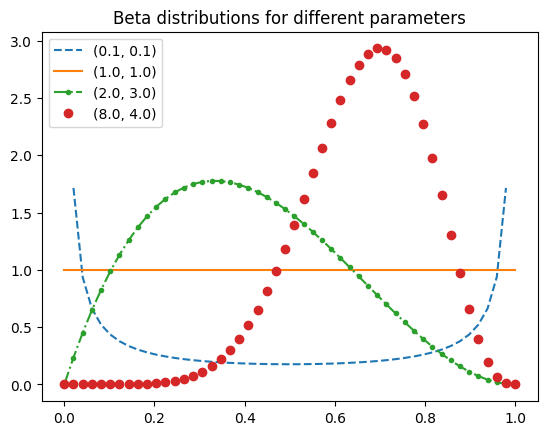

In [10]:
parameters = [(0.1, 0.1), (1.0, 1.0), (2.0, 3.0), (8.0, 4.0)]
X = np.linspace(0, 1, 50)
for i, param in enumerate(parameters):
    a, b = param[0], param[1]
    X_beta = beta_distribution(X, a, b)
    plt.plot(X, X_beta, form[i], label=f'{param}')
plt.legend()
plt.title("Beta distributions for different parameters")
plt.show()

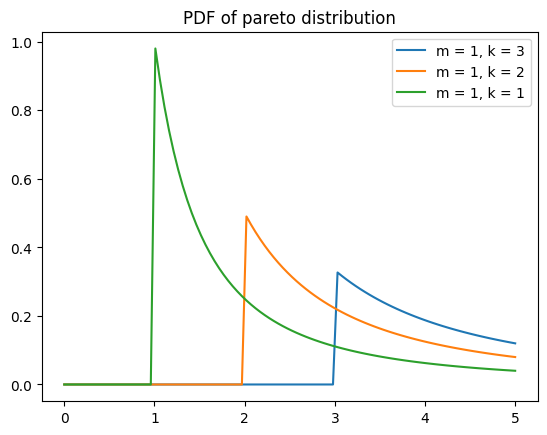

In [11]:
#Pareto Distribution Example:
m = 1
parameters = [3, 2, 1]
X = np.linspace(1e-15, 5, 100)
for i, param in enumerate(parameters):
    k = param
    X_pareto = pareto_distribution(X, m, k)
    plt.plot(X, X_pareto, label=f'm = {m}, k = {k}')
plt.legend()
plt.title("PDF of pareto distribution")
plt.show()